## 데이터 증강(Data Augmentation)
데이터가 적으면 모델이 훈련 데이터만 외움- > 과적합 발생 -> 새 데이터에 약함 <br>
**데이터 증강은?** 가지고 있는 데이터를 조금씩 변형해서 새로운 데이터처럼 쓰자 <br>
ex) Flip, Rotation, Zoom, Brightness, Contrast <br>

즉, 데이터 증강을 함으로써 테스트 성능 향상

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"), # 좌우 뒤집
    layers.RandomRotation(0.3), # 회전
    layers.RandomZoom(0.7), # 확대/축소
    layers.RandomContrast(0.5), # 밝기/대비
], name="data_augmentation")

In [3]:
!curl -L "https://public.roboflow.com/ds/wjlzPmyw2x?key=EF4oRpqeOv" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1438      0 --:--:-- --:--:-- --:--:--  1440
100 11.5M  100 11.5M    0     0  3641k      0  0:00:03  0:00:03 --:--:-- 5287k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: export/
   creating: export/images/
 extracting: export/images/raccoon-100_jpg.rf.YWIftfgUdZqJLTkvI9W2.jpg  
 extracting: export/images/raccoon-101_jpg.rf.ebfr15yC06H7KdSNWJkC.jpg  
 extracting: export/images/raccoon-102_jpg.rf.Vtizg4N4D1Wn9fv4sBaJ.jpg  
 extracting: export/images/raccoon-103_jpg.rf.yx4ScGFA2FZ23qfitAfV.jpg  
 extracting: export/images/raccoon-104_jpg.rf.HdpZVmq1teO4b2ny0HJO.jpg  
 extracting: export/images/raccoon-105_jpg.rf.S4P0w34qeFrLIhNIHmuD.jpg  
 extracting: export/images/raccoon-106_jpg.rf.UCuMtEoBFF5lvb

In [ ]:
# img_path = "/content/_106583508_fledge_pf.jpg"
img_path = "/content/dataset/test/images/raccoon-57_jpg.rf.26f3fae218f26088f6a7405c58ae8020.jpg"
img = keras.utils.load_img(img_path, target_size=(180, 180))
img_array = keras.utils.img_to_array(img)
img = tf.expand_dims(img_array, axis=0)

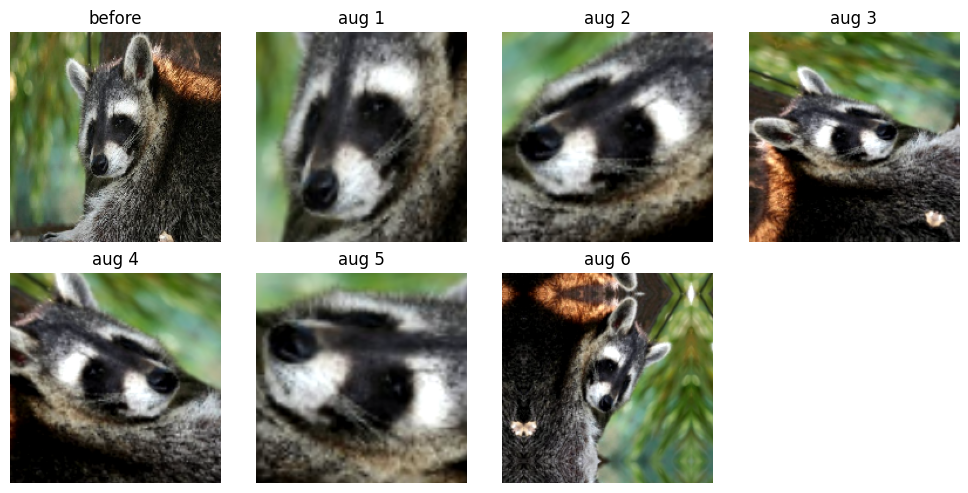

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(2, 4, 1)
plt.imshow(img[0].numpy().astype("uint8"))
plt.title("before")
plt.axis("off")

for i in range(6):
    aug_img = data_augmentation(img, training=True)
    plt.subplot(2, 4, i+2)
    plt.imshow(aug_img[0].numpy().astype("uint8"))
    plt.title(f"aug {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## Ultralytics를 사용한 K-Fold 교차 검증

### YOLO로 단일 학습 먼저 진행

In [4]:
!pip install PyYAML
!pip install ultralytics

In [6]:
import yaml

data = {
    'train': '/content/dataset/train',
    'val': '/content/dataset/valid',
    'nc': 1,
    'names': ['raccoon']
}

with open('/content/dataset/data.yaml', 'w') as f:
    yaml.dump(data, f)

with open('/content/dataset/data.yaml', 'r') as f:
    aquarium_yaml = yaml.safe_load(f)
    print(aquarium_yaml)

{'names': ['raccoon'], 'nc': 1, 'train': '/content/dataset/train', 'val': '/content/dataset/valid'}


In [7]:
import ultralytics

ultralytics.checks()

from ultralytics import YOLO

model = YOLO('yolov8s.pt')

Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.0/112.6 GB disk)


In [8]:
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

In [9]:
!cat /content/dataset/data.yaml

names:
- raccoon
nc: 1
train: /content/dataset/train
val: /content/dataset/valid


In [10]:
model.train(
    data='/content/dataset/data.yaml',
    epochs=100,
    imgsz=640,
    batch=16,
    patience=50,
)

Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=50, perspective=0.0, plots=True, pose=12.0, pretrained=T

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b97ae153920>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [11]:
print(type(model.names), len(model.names))
print(model.names)

<class 'dict'> 1
{0: 'raccoon'}


In [13]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train/weights/best.pt")

metrics = model.val(data="/content/dataset/data.yaml", split="val")

print("mAP50-95:", metrics.box.map)
print("mAP50:", metrics.box.map50)
print("Precision:", metrics.box.mp)
print("Recall:", metrics.box.mr)

Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 947.1±448.7 MB/s, size: 32.5 KB)
val: Scanning /content/dataset/valid/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 29/29 48115.0it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 2.0it/s 1.0s
                   all         29         29      0.933          1       0.99      0.676
Speed: 0.2ms preprocess, 19.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val
mAP50-95: 0.6761715275963627
mAP50: 0.9897004608294931
Precision: 0.9331303468800732
Recall: 1.0



image 1/17 /content/dataset/test/images/raccoon-57_jpg.rf.26f3fae218f26088f6a7405c58ae8020.jpg: 640x640 3 raccoons, 16.3ms
image 2/17 /content/dataset/test/images/raccoon-58_jpg.rf.ff9de9977475e0086e7ab582122c5167.jpg: 640x640 1 raccoon, 16.3ms
image 3/17 /content/dataset/test/images/raccoon-59_jpg.rf.388d6dd8c9d5a6fc7ca75790e680c269.jpg: 640x640 1 raccoon, 16.2ms
image 4/17 /content/dataset/test/images/raccoon-60_jpg.rf.cff8b797e6b5c9b716b6be70be2b6b33.jpg: 640x640 1 raccoon, 16.2ms
image 5/17 /content/dataset/test/images/raccoon-61_jpg.rf.58c4f561336525f59d395ce21508523b.jpg: 640x640 1 raccoon, 16.2ms
image 6/17 /content/dataset/test/images/raccoon-62_jpg.rf.e997ede5457f069436178f08065d9a61.jpg: 640x640 2 raccoons, 16.3ms
image 7/17 /content/dataset/test/images/raccoon-63_jpg.rf.1b33356e79739a8a1f3676a9f4f9f97a.jpg: 640x640 1 raccoon, 16.3ms
image 8/17 /content/dataset/test/images/raccoon-64_jpg.rf.5201bb870708d051100bbbb8c148ecd2.jpg: 640x640 1 raccoon, 16.3ms
image 9/17 /content/d

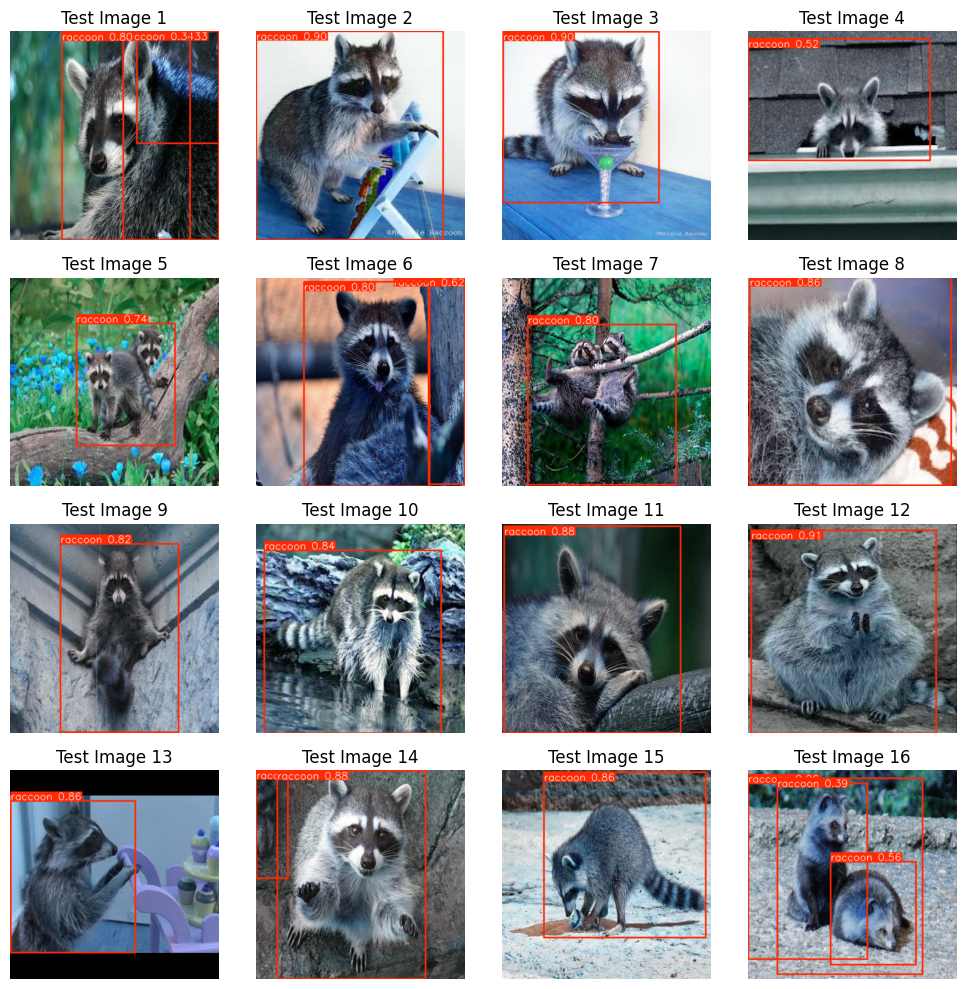

In [15]:
import matplotlib.pyplot as plt
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train/weights/best.pt")
results = model.predict(source="/content/dataset/test/images")

count = min(16, len(results))
plt.figure(figsize=(10, 10))

for i, res in enumerate(results[:count]):
    img = res.plot()
    ax = plt.subplot(4, 4, i + 1)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"Test Image {i+1}")

plt.tight_layout()
plt.show()